<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/20220608_DA13_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JSON

* JSON(JavaScript Object Notation) : 자바스크립트 객체 표현법.
* `{key1 : value1, key2 : value2, ...}` 형식의 문자열.
* Python의 `dict` 클래스 객체의 문자열 표현과 비슷.
* `json` 모듈 : JSON 형식 문자열(str) <---> `dict` 타입 객체(object)
    * `json.dumps(obj)` : Python 객체 obj를 JSON 형식의 문자열로 변환(serialization, 직렬화)해서 리턴.
    * `json.loads(s)` : JSON 형식의 문자열 s를 Python 객체로 변환(de-serialization, 역직렬화)해서 리턴.
    * `json.dump(obj, fp)` : Python 객체 obj를 문자열로 변환해서 파일 fp에 씀(write).
    * `json.load(fp)` : 파일 fp에서 JSON 형식의 문자열을 읽어서 Python 객체로 변환하고 리턴.

# Imports

In [ ]:
import json # JSON 읽기/쓰기 기능을 가지고 있는 파이썬 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Serialization

In [ ]:
# 직렬화 : Python 객체 ---> JSON 문자열
person = {
    'name' : '홍길동',
    'age' : 16,
    'phones' : ['02-0000-0000', '010-1111-1111']
}

In [ ]:
type(person) # dict 타입(객체)

dict

In [ ]:
person_json = json.dumps(person)
person_json

'{"name": "\\ud64d\\uae38\\ub3d9", "age": 16, "phones": ["02-0000-0000", "010-1111-1111"]}'

In [ ]:
type(person_json) # str 타입(문자열)

str

# Deserialization

In [ ]:
# 역직렬화 : JSON 형식의 문자열 ---> Python 객체(object)
result = json.loads(person_json)
result

{'age': 16, 'name': '홍길동', 'phones': ['02-0000-0000', '010-1111-1111']}

In [ ]:
type(result)

dict

# JSON 파일 쓰기(write)/읽기(read)

*  pickle : binary(이진) 파일 읽기/쓰기
*  JSON : text(텍스트) 파일 읽기/쓰기

In [ ]:
with open('gildong.json', mode='wt') as f:  # 파일을 '텍스트 쓰기' 모드로 오픈.
    # mode='rt' 기본값, mode='w'와 mode='wt'는 같은 의미.
    f.write(json.dumps(person))             # person 객체를 JSON 문자열로 변환 후 파일에 씀(write).
    # with-as 구문 종료 후에는 f.close() 자동으로 호출됨.

In [ ]:
with open('gildong.json') as f:   # 파일을 '텍스트 읽기(rt)' 모드로 오픈.
    line = f.readline()           # 파일의 첫 번째 줄(line)을 읽음.
    print(line)
    obj = json.loads(line)        # 파일에서 읽은 문자열을 객체로 변환
    print(obj)

{"name": "\ud64d\uae38\ub3d9", "age": 16, "phones": ["02-0000-0000", "010-1111-1111"]}
{'name': '홍길동', 'age': 16, 'phones': ['02-0000-0000', '010-1111-1111']}


In [ ]:
file_name = 'movies.txt'
with open(file_name, mode='w') as f:
    # dict 객체 생성
    movie1 = {'mid' : 1, 'title' : '브로커', 'genre' : 'drama'}
    movie2 = {'mid' : 2, 'title' : '범죄도시2', 'genre' : 'action'}
    movie3 = {'mid' : 3, 'title' : '짱구는 못말려'}
    # dict 객체 ---> JSON 문자열
    m1_s = json.dumps(movie1)
    m2_s = json.dumps(movie2)
    m3_s = json.dumps(movie3)
    # 3개의 문자열을 한 줄씩 파일에 write
    f.write(m1_s + '\n')
    f.write(m2_s + '\n')
    f.write(m3_s + '\n')

In [ ]:
# movies.txt 파일에서 한 줄씩 읽으면서 읽은 문자열을 dict 객체로 변환하고 리스트에 추가.
movies = []
with open(file_name, mode='rt') as f:
    for line in f:
        obj = json.loads(line.strip())
        movies.append(obj)

movies

[{'genre': 'drama', 'mid': 1, 'title': '브로커'},
 {'genre': 'action', 'mid': 2, 'title': '범죄도시2'},
 {'mid': 3, 'title': '짱구는 못말려'}]

In [ ]:
# list comprehension
with open(file_name) as f:
    movies = [json.loads(line.strip()) for line in f]
movies

[{'genre': 'drama', 'mid': 1, 'title': '브로커'},
 {'genre': 'action', 'mid': 2, 'title': '범죄도시2'},
 {'mid': 3, 'title': '짱구는 못말려'}]

In [ ]:
df = pd.DataFrame(movies)
df

,mid,title,genre
0,1,브로커,drama
1,2,범죄도시2,action
2,3,짱구는 못말려,NaN


# bitly 데이터 셋

*  https://github.com/wesm/pydata-book/blob/2nd-edition/datasets/bitly_usagov/example.txt 파일을 다운로드.
    * bit.ly 서비스를 이용해서 usa.gov 사이트에 접속한 클라이언트(브라우저)들의 로그 정보를 저장한 파일.
*  다운로드한 파일을 Google Drive 또는 Colab 활성 세션에 업로드.
*  업로드한 파일을 읽기 모드로 오픈.
*  파일의 첫 번째 줄부터 마지막 줄까지 한 줄씩 읽으면서 반복.
    *  읽은 문자열(json-format)을 dict 타입 객체로 변환하고 리스트에 추가.
*  파일 내용이 모두 append가 끝난 list를 DataFrame으로 변환.
*  DataFrame 확인. 

In [ ]:
# file_path = '/content/example.txt'   # 절대 경로
with open('example.txt') as file:
    records = [json.loads(s.strip()) for s in file]

In [ ]:
len(records) # 3,560개의 dict 객체들을 저장하는 리스트

3560

In [ ]:
# 리스트의 첫 번째 원소
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [ ]:
# 리스트의 마지막 원소
records[-1]

{'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; MS-RTC LM 8; .NET4.0C; .NET4.0E; .NET CLR 1.1.4322)',
 'al': 'en-US',
 'c': 'US',
 'cy': 'Mc Lean',
 'g': 'qxKrTK',
 'gr': 'VA',
 'h': 'qxKrTK',
 'hc': 1312897670,
 'hh': '1.usa.gov',
 'l': 'bitly',
 'll': [38.935799, -77.162102],
 'nk': 0,
 'r': 'http://t.co/OEEEvwjU',
 't': 1331926849,
 'tz': 'America/New_York',
 'u': 'http://herndon-va.gov/Content/public_safety/Public_Information/weekly_reports.aspx?cnlid=1736'}

In [ ]:
df = pd.DataFrame(records)

In [ ]:
df.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [ ]:
df.info()
# 반정형 데이터(json)를 정형 데이터(DataFrame)로 변환하게 되면 보통 NA들이 많이 생기게 됨.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

## 사용자 접속 지역(시간대, tz) 분석

* 사용자가 가장 많이 접속하는 시간대 지역



In [ ]:
df['tz']

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

In [ ]:
df['tz'].value_counts()

America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Uzhgorod            1
Australia/Queensland       1
Europe/Sofia               1
America/Costa_Rica         1
America/Tegucigalpa        1
Name: tz, Length: 97, dtype: int64

In [ ]:
# 데이터 프레임의 복사본을 생성
df_clean = df.copy()

In [ ]:
# tz 컬럼의 NA 또는 NaN을 'Missing' 문자열로 대체.
df_clean['tz'] = df_clean['tz'].fillna('Missing')

In [ ]:
df_clean['tz'].value_counts()

America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Uzhgorod            1
Australia/Queensland       1
Europe/Sofia               1
America/Costa_Rica         1
America/Tegucigalpa        1
Name: tz, Length: 98, dtype: int64

In [ ]:
# tz 컬럼의 값이 빈 문자열('')인 경우 'Unknown' 문자열로 대체.
df_clean.loc[df_clean['tz'] == '', 'tz'] = 'Unknown'

In [ ]:
df_clean['tz'].value_counts()

America/New_York        1251
Unknown                  521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Uzhgorod            1
Australia/Queensland       1
Europe/Sofia               1
America/Costa_Rica         1
America/Tegucigalpa        1
Name: tz, Length: 98, dtype: int64

In [ ]:
# 사용자들의 접속이 가장 많은 10개 지역, 시각화
tz_top10 = df_clean['tz'].value_counts().head(10)
tz_top10

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

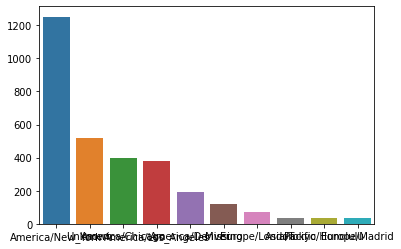

In [ ]:
sns.barplot(x=tz_top10.index, y=tz_top10.values)
plt.show()

## 사용자 접속 국가(c) 분석

* 가장 많이 접속한 국가 상위 10개, 시각화

In [ ]:
# NA/NaN을 'Missing'으로 대체
df_clean['c'] = df_clean['c'].fillna('Missing')
# 빈 문자열('')을 'Unknown'으로 대체
df_clean.loc[df_clean['c'] == '', 'c'] = 'Unknown'

In [ ]:
c_top10 = df_clean['c'].value_counts().head(10)
c_top10

US         2305
Missing     641
GB           74
CA           60
ES           37
JP           37
BR           35
DE           28
IT           27
NL           22
Name: c, dtype: int64

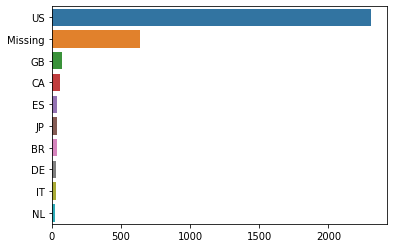

In [ ]:
sns.barplot(x=c_top10.values, y=c_top10.index)
plt.show()

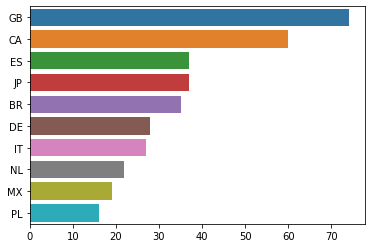

In [ ]:
# US과 Missing을 제외한 상위 10개 국가 시각화
c_top10_2 = df_clean['c'].value_counts()[2:12]

sns.barplot(x=c_top10_2.values, y=c_top10_2.index)
plt.show()

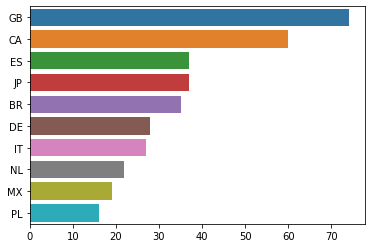

In [ ]:
# Another method
c_top10_2 = df_clean.loc[(df_clean['c'] != 'US') & (df_clean['c'] != 'Missing'), 'c'].value_counts().head(10)

sns.barplot(x=c_top10_2.values, y=c_top10_2.index)
plt.show()

## 사용자 접속 환경(OS) 분석

* a 컬럼(agent) 문자열을 분석해서 Windows/Non-Windows 분류

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            3560 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3560 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [ ]:
df_clean['a']

0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                  GoogleMaps/RochesterNY
2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
                              ...                        
3555    Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...
3556    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
3557                               GoogleMaps/RochesterNY
3558                                       GoogleProducer
3559    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
Name: a, Length: 3560, dtype: object

In [ ]:
# a 컬럼이 NA(NaN)인 행들을 삭제 - NA(NaN, Null)가 아닌 행들을 선택
df_clean = df_clean[df_clean['a'].notnull()]

* `pd.Series.notnull()` : 값이 Null이 아니면 True를 리턴.
* `pd.Series.isnull()` : 값이 Null이면 True를 리턴.

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            3440 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  0 non-null      float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 510.6+ K

In [ ]:
# 'os' 파생 변수(컬럼) 추가
# 'a' 컬럼에 'Windows' 문자열이 포함되어 있으면 Windows, 그렇지 않으면 Other를 저장.
df_clean['os'] = np.where(df_clean['a'].str.lower().str.contains('windows'),
                          'Windows', 'Other')
# df_clean의 'a' 컬럼을 소문자화한 문자열에 'windows'가 포함되면 'os' 컬럼 값에 'Windows'를, 그렇지 않으면 'Other'를 저장

In [ ]:
df_clean['os'].value_counts()

Windows    2246
Other      1194
Name: os, dtype: int64

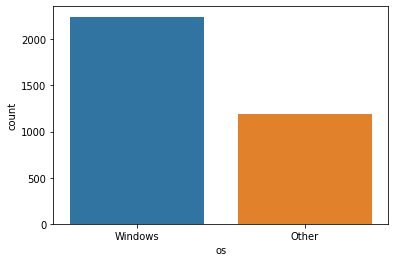

In [ ]:
sns.countplot(x='os', data=df_clean)
plt.show()

## 사용자 시간대 접속 지역별, 운영 체제별 빈도수

In [ ]:
tz_os_counts = df_clean.groupby(['tz', 'os']).size()
tz_os_counts

tz                   os     
Africa/Cairo         Windows      3
Africa/Casablanca    Windows      1
Africa/Ceuta         Windows      2
Africa/Johannesburg  Windows      1
Africa/Lusaka        Windows      1
                               ... 
Pacific/Auckland     Other        3
                     Windows      8
Pacific/Honolulu     Windows     36
Unknown              Other      245
                     Windows    276
Length: 149, dtype: int64

In [ ]:
tz_top10.index

Index(['America/New_York', 'Unknown', 'America/Chicago', 'America/Los_Angeles',
       'America/Denver', 'Missing', 'Europe/London', 'Asia/Tokyo',
       'Pacific/Honolulu', 'Europe/Madrid'],
      dtype='object')

In [ ]:
tz_os_counts = tz_os_counts.reset_index(level=-1) # 가장 마지막 레벨의 인덱스만 컬럼으로 변환.
tz_os_counts

,os,0
tz,,
Africa/Cairo,Windows,3
Africa/Casablanca,Windows,1
Africa/Ceuta,Windows,2
Africa/Johannesburg,Windows,1
Africa/Lusaka,Windows,1
...,...,...
Pacific/Auckland,Other,3
Pacific/Auckland,Windows,8
Pacific/Honolulu,Windows,36


In [ ]:
tz_top10 = df_clean['tz'].value_counts().head(10)
tz_top10

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [ ]:
result = tz_os_counts.loc[tz_top10.index]
result

,os,0
tz,,
America/New_York,Other,339
America/New_York,Windows,912
Unknown,Other,245
Unknown,Windows,276
America/Chicago,Other,115
America/Chicago,Windows,285
America/Los_Angeles,Other,130
America/Los_Angeles,Windows,252
America/Denver,Other,132


In [ ]:
result = result.reset_index()
result

,tz,os,0
0,America/New_York,Other,339
1,America/New_York,Windows,912
2,Unknown,Other,245
3,Unknown,Windows,276
4,America/Chicago,Other,115
5,America/Chicago,Windows,285
6,America/Los_Angeles,Other,130
7,America/Los_Angeles,Windows,252
8,America/Denver,Other,132
9,America/Denver,Windows,59


In [ ]:
result.columns = ['tz', 'os', 'count']  # 데이터 프레임의 컬럼 이름
result.head()

,tz,os,count
0,America/New_York,Other,339
1,America/New_York,Windows,912
2,Unknown,Other,245
3,Unknown,Windows,276
4,America/Chicago,Other,115


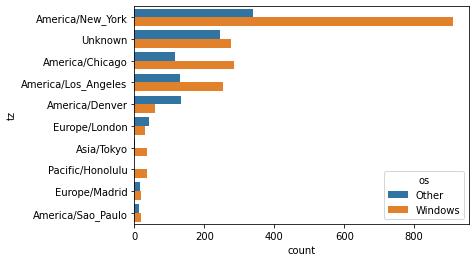

In [ ]:
sns.barplot(x='count', y='tz', hue='os', data=result)
plt.show()

In [ ]:
df_clean.groupby(['tz', 'os']).size()

tz                   os     
Africa/Cairo         Windows      3
Africa/Casablanca    Windows      1
Africa/Ceuta         Windows      2
Africa/Johannesburg  Windows      1
Africa/Lusaka        Windows      1
                               ... 
Pacific/Auckland     Other        3
                     Windows      8
Pacific/Honolulu     Windows     36
Unknown              Other      245
                     Windows    276
Length: 149, dtype: int64

In [ ]:
df_clean.groupby(['tz', 'os']).size().unstack().fillna(0)

os,Other,Windows
tz,,
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
...,...,...
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0
Pacific/Auckland,3.0,8.0


In [ ]:
result2 = df_clean.pivot_table(index='tz', columns='os', aggfunc='size', fill_value=0)
result2

os,Other,Windows
tz,,
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
...,...,...
Europe/Warsaw,1,15
Europe/Zurich,4,0
Pacific/Auckland,3,8


In [ ]:
result2['total'] = result2['Other'] + result2['Windows']
result2.head()

os,Other,Windows,total
tz,,,
Africa/Cairo,0,3,3
Africa/Casablanca,0,1,1
Africa/Ceuta,0,2,2
Africa/Johannesburg,0,1,1
Africa/Lusaka,0,1,1


In [ ]:
result2.sort_values(by='total', ascending=False)

os,Other,Windows,total
tz,,,
America/New_York,339,912,1251
Unknown,245,276,521
America/Chicago,115,285,400
America/Los_Angeles,130,252,382
America/Denver,132,59,191
...,...,...,...
Asia/Pontianak,1,0,1
Asia/Riyadh,0,1,1
Africa/Casablanca,0,1,1


In [ ]:
df2 = result2.sort_values(by='total', ascending=False).head(10)
df2

os,Other,Windows,total
tz,,,
America/New_York,339,912,1251
Unknown,245,276,521
America/Chicago,115,285,400
America/Los_Angeles,130,252,382
America/Denver,132,59,191
Europe/London,43,31,74
Asia/Tokyo,2,35,37
Pacific/Honolulu,0,36,36
Europe/Madrid,16,19,35


In [ ]:
df2 = df2.drop(columns='total')
df2

os,Other,Windows
tz,,
America/New_York,339,912
Unknown,245,276
America/Chicago,115,285
America/Los_Angeles,130,252
America/Denver,132,59
Europe/London,43,31
Asia/Tokyo,2,35
Pacific/Honolulu,0,36
Europe/Madrid,16,19


In [ ]:
df2.stack()

tz                   os     
America/New_York     Other      339
                     Windows    912
Unknown              Other      245
                     Windows    276
America/Chicago      Other      115
                     Windows    285
America/Los_Angeles  Other      130
                     Windows    252
America/Denver       Other      132
                     Windows     59
Europe/London        Other       43
                     Windows     31
Asia/Tokyo           Other        2
                     Windows     35
Pacific/Honolulu     Other        0
                     Windows     36
Europe/Madrid        Other       16
                     Windows     19
America/Sao_Paulo    Other       13
                     Windows     20
dtype: int64

In [ ]:
df2.stack().reset_index()

,tz,os,0
0,America/New_York,Other,339
1,America/New_York,Windows,912
2,Unknown,Other,245
3,Unknown,Windows,276
4,America/Chicago,Other,115
5,America/Chicago,Windows,285
6,America/Los_Angeles,Other,130
7,America/Los_Angeles,Windows,252
8,America/Denver,Other,132
9,America/Denver,Windows,59
